In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
%matplotlib inline 

filename="Nc_Files/arc4/FWmadHIST_f09_f09_mg17_3.cam.h1.2005-01-01-07200.nc"

ds = xr.open_dataset(filename)

ds

<xarray.Dataset>
Dimensions:       (lat: 192, lon: 288, lev: 70, ilev: 71, time: 1, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 976.3 992.6
  * ilev          (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 985.1 1e+03
  * time          (time) object 2005-01-01 02:00:00
Dimensions without coordinates: nbnd
Data variables: (12/58)
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    ...            ...
    PS            (time, lat, lon) float32 ...
    T             (time, lev, lat, lon) float32 ...
    U             (time, lev, lat, lon) float32 ...
    V             (time, lev, lat, lon) float32 ...
    Z3            (time, lev, lat, lon) float32 ...
    e             (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FWmadHIST_f09_f09_mg17_3
    logname:           sestay
    host:              
    initial_file:      f.e21.FWmadHIST.f09_f09_mg17.cesm2.1-exp011.001_v2.cam...
    topography_file:   /nobackup/CESM/inputdata/atm/cam/topo/fv_0.9x1.25_nc30...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  minute_30

In [2]:
time = ds.variables['time']
lon = ds.variables['lon']
lat = ds.variables['lat']
lev = ds.variables['lev']

dst = ds.transpose("lev", ...)
O = dst.variables["O"]
O3 = dst.variables["O3"]
H = dst.variables["H"]
temp = dst.variables['T']

In [3]:
geopH = dst.variables['Z3'] / 1000 #m-> km
Zavg = geopH.mean(('time','lat', 'lon'))

Odens = ( O * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
O3dens = ( O3 * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)
Hdens = ( H * 1e-6 * 100 * lev ) / (1.380503e-23 * temp)

Odens = Odens / 10**10 # convert to 10^3 cm-3
O3dens = O3dens / 10**9 # convert to 10^3 cm-3
Hdens = Hdens / 10**7 # convert to 10^3 cm-3

#Zavg #lev 70
#Odens #lev: 70 time: 1 lat: 192 lon: 288

In [4]:
Odens_plot = Odens.mean(('lon','time'))
O3dens_plot = O3dens.mean(('lon','time'))
Hdens_plot = Hdens.mean(('lon','time'))


#Odens_plot #lev: 70 lat: 192

In [5]:
#Odens_plot.min() #array(4.03567071e-15)
#np.log10(Odens_plot.min()) #array(-14.39408428)
#np.floor(np.log10(Odens_plot.min())-1) #array(-16.)
#np.floor((np.log10(Odens_plot.min())-1)+7) #array(-16.)


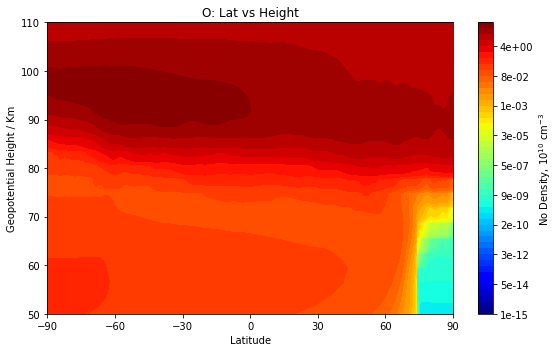

In [6]:
#ticks = np.linspace(0, 20.0, num=17)
ticks = np.geomspace(10**-15, 10**2) 

#lev_exp = np.arange(np.floor(np.log10(Odens_plot.min())-1 ),
#                    np.ceil(np.log10(Odens_plot.max())+1))
#levs = np.power(10, lev_exp)

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, Zavg, Odens_plot, 
                levels=ticks, 
                locator=ticker.LogLocator(),
                #norm=colors.LogNorm(),
                cmap=jet)

ax.set_ylabel('Geopotential Height / Km')
ax.set_ylim(50, 110) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])

cbar = fig.colorbar(C,format='%.0e')#,ticks=ticks[::4], pad=0.05)
cbar.set_label(r'No Density, 10$^{10}$ cm$^{-3}$')

plt.title('O: Lat vs Height')
plt.tight_layout()

figname=str('O: Lat vs Height'+'.png')
#plt.savefig('./Figures/'+str(figname))

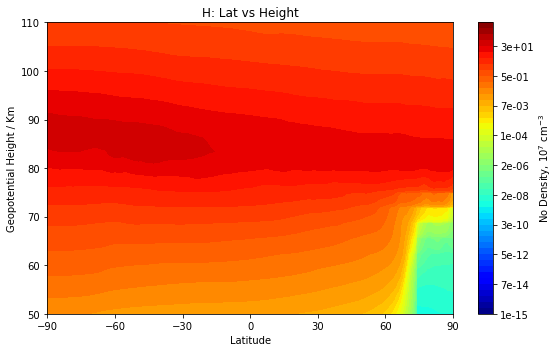

In [7]:
#ticks = np.linspace(0, 20.0, num=17)
ticks = np.geomspace(10**-15, 10**3) 


#lev_exp = np.arange(np.floor(np.log10(Hdens_plot.min())-1),
#                    np.ceil(np.log10(Hdens_plot.max())+1))
#levs = np.power(10, lev_exp)

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, Zavg, Hdens_plot, 
                levels=ticks,
                locator=ticker.LogLocator(),
                cmap=jet)

ax.set_ylabel('Geopotential Height / Km')
ax.set_ylim(50, 110) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])

cbar = fig.colorbar(C,format='%.0e')#,ticks=ticks[::4], pad=0.05)
cbar.set_label(r'No Density, 10$^{7}$ cm$^{-3}$')

plt.title('H: Lat vs Height')
plt.tight_layout()

figname=str('H: Lat vs Height'+'.png')
#plt.savefig('./Figures/'+str(figname))

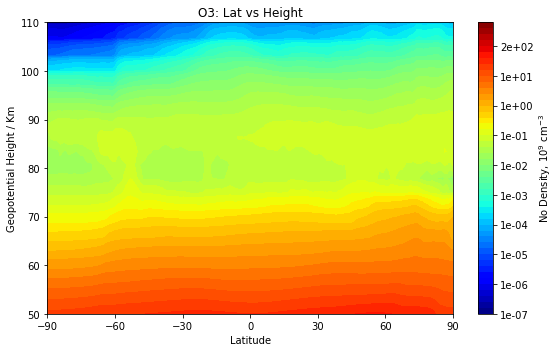

In [8]:
#ticks = np.linspace(0, 20.0, num=17)
ticks = np.geomspace(10**-7, 10**3) 

#lev_exp = np.arange(np.floor(np.log10(O3dens_plot.min())-1),
#                    np.ceil(np.log10(O3dens_plot.max())+1))
#levs = np.power(10, lev_exp)

fig, ax = plt.subplots(figsize=(8, 5))
C = ax.contourf(lat, Zavg, O3dens_plot, 
                levels=ticks,
                locator=ticker.LogLocator(),
                cmap=jet)

ax.set_ylabel('Geopotential Height / Km')
ax.set_ylim(50, 110) 

ax.set_xlabel('Latitude')
ax.set_xticks(ticks=[-90, -60, -30, 0, 30, 60, 90])

cbar = fig.colorbar(C,format='%.0e')#,ticks=ticks[::4], pad=0.05)
cbar.set_label(r'No Density, 10$^{9}$ cm$^{-3}$')

plt.title('O3: Lat vs Height')
plt.tight_layout()

figname=str('O3: Lat vs Height'+'.png')
#plt.savefig('./Figures/'+str(figname))